In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Datasets

In [6]:
def loadCSV(filename):
    file = filename
    if '.csv' not in filename:
        file += '.csv'
    data = pd.read_csv(file, encoding = 'ISO-8859-1')
    return data

In [7]:
d1 = loadCSV('tweetset_1')
d2 = loadCSV('tweetset_2')

In [8]:
p1 = loadCSV('processed_1')
p2 = loadCSV('processed_2')

# Standardize Tweetset

In [9]:
d1 = d1.rename(columns = {'does_this_tweet_contain_hate_speech':'class',
                          'tweet_text':'tweet'})
    
originalClass = ['The tweet is not offensive',
                 'The tweet uses offensive language but not hate speech',
                 'The tweet contains hate speech']
newClass = [0, 1, 2]

d1['class'] = d1['class'].replace(originalClass, newClass)
d1 = d1[['tweet', 'class']]

In [11]:
originalClass = [0, 1, 2]
newClass = [2, 1, 0]
d2['class'] = d2['class'].replace(originalClass, newClass)
d2 = d2[['tweet', 'class']]

# Punctuation Counts

In [25]:
def symbolCount(data, symbol, raw = True):
    
    all_tweets = 0
    neutral = 0
    offensive = 0
    hate = 0
    
    for index, row in data.iterrows():
        tweet = row['tweet']
        category = row['class']
        
        if symbol in tweet:
            all_tweets += 1
            if category == 0:
                neutral += 1
            elif category == 1:
                offensive += 1
            elif category == 2:
                hate += 1
    
    if raw:
        return all_tweets, neutral, offensive, hate
    else:
        return all_tweets, neutral, offensive

In [37]:
def iterateCount(dictionary, num):
    try:
        dictionary[num] += 1
    except KeyError:
        dictionary[num] = 1

In [42]:
def symbolDist(data, symbol, raw = True):
    all_tweets = {}
    neutral = {}
    offensive = {}
    hate = {}
    
    for index, row in data.iterrows():
        category = row['class']
        instances = row['tweet'].count(symbol)
        
        iterateCount(all_tweets, instances)
        if category == 0:
            iterateCount(neutral, instances)
        elif category == 1:
            iterateCount(offensive, instances)
        elif category == 2:
            iterateCount(hate, instances)
    
    if raw:
        return all_tweets, neutral, offensive, hate
    else:
        return all_tweets, neutral, offensive

In [98]:
def formatDist(dictionary):
    keys = list(dictionary.keys())
    keys.sort()
    
    excess = 0
    
    x = []
    y = []
    for k in keys:
        if k < 10:
            x.append(str(k))
            y.append(dictionary[k])
        else:
            excess += 1
            
    if excess:
        x.append('10+')
        y.append(excess)
    
    return x, y, keys

In [100]:
def plotDist(dictionary, symbol, name):
    x, y, k = formatDist(dictionary)
    plt.bar(x[1:], y[1:], align = 'center', alpha = 0.5)
    plt.xlabel('Instances of "%s" in a Tweet' % symbol)
    plt.ylabel('Number of Tweets')
    plt.title('Distribution of "%s" Count - %s' % (symbol, name))
    plt.show()
    
    print("Instances in Tweet: Number of Tweets")
    for key in k:
        print("%s: %s" % (key, dictionary[key]))

# '!' in Tweetset # 1

In [96]:
a,n,o,h = symbolDist(d1, '!')

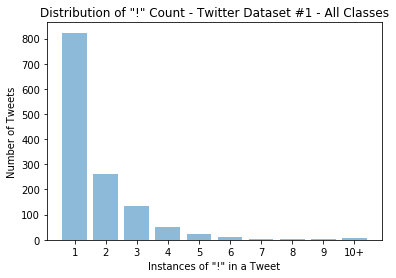

Instances in Tweet: Number of Tweets
0: 13180
1: 823
2: 261
3: 136
4: 51
5: 23
6: 12
7: 5
8: 5
9: 5
10: 2
11: 1
12: 1
13: 1
21: 1
38: 1
63: 1


In [101]:
plotDist(a, '!', 'Twitter Dataset #1 - All Classes')